In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

Sklearn $\ge$ 0.19 is necessary for the efficient implementation of tsne.

In [2]:
import sklearn.manifold  
sklearn.__version__

'0.19.0'

### Pull the data from the internet

MNIST is a traditional clustering data set consisting of a set of 28x28 greyscale images of handwritten digits.  We will do the traditional thing with this data a treat the greyscale images as a 28x28 = 784 long vector and compute Euclidean distance between these vectors. 

In [3]:
%%time
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

CPU times: user 39.8 ms, sys: 54.9 ms, total: 94.7 ms
Wall time: 130 ms


Each image is flattened into a single 784 long greyscale vector.  

In [5]:
data = mnist.data
labels = mnist.target
data.shape

(70000, 784)

### Now let's use UMAP to embed these points into a two dimensional space.

In [6]:
fit = umap.UMAP(n_neighbors=15, random_state=42, metric='euclidean')
%time u = fit.fit_transform(data)

CPU times: user 2min 7s, sys: 3.86 s, total: 2min 11s
Wall time: 2min 3s


In [21]:
output = pd.DataFrame(u, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_umap.csv')

In [18]:
pd.DataFrame(u, columns=('x','y')).to_csv('embedding_mnist_umap.csv')

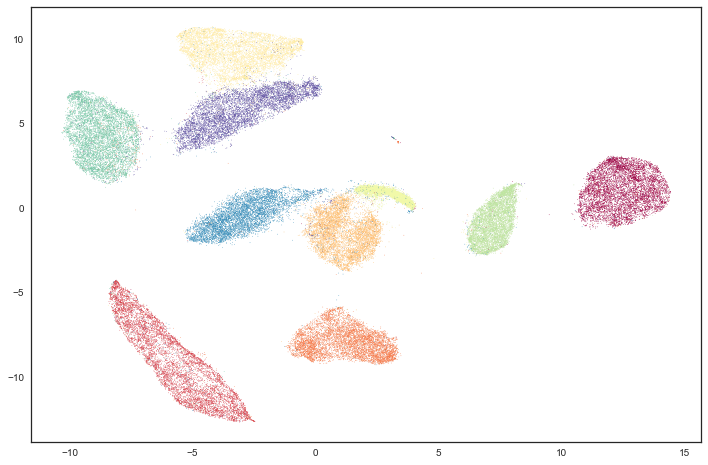

In [7]:
plt.scatter(u[:,0], u[:,1], c=labels, cmap="Spectral", s=0.1)
plt.title('MNIST data embedded into two dimensions by UMAP')

### T-SNE

In [8]:
fit_tsne = sklearn.manifold.TSNE()
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 1h 34min 13s, sys: 1min 58s, total: 1h 36min 12s
Wall time: 1h 35min 45s


In [20]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_tsne.csv')

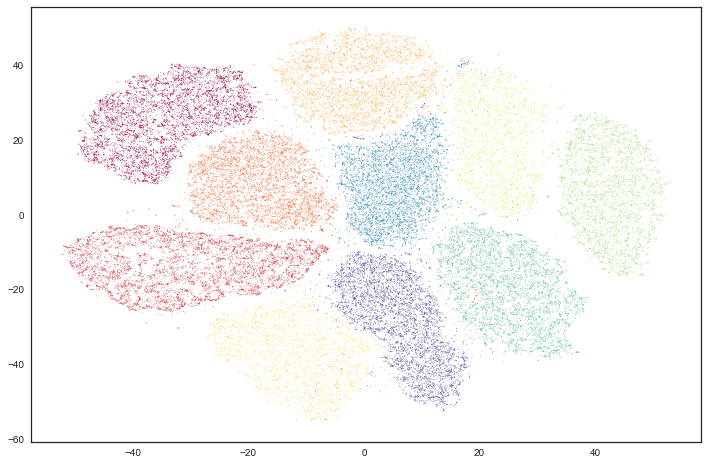

In [12]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=labels, cmap="Spectral", s=0.1)

### PCA

The old standby of PCA which is blindingly fast to compute and often used as an initialization to many of the more complex algorithms.  This isn't really a competitor but instead should be thought of as a strawman.  Given that other algorithms initialize with these values one would hope that they can do better.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
%time u_pca = pca.fit_transform(data)

CPU times: user 3.48 s, sys: 451 ms, total: 3.93 s
Wall time: 2.67 s


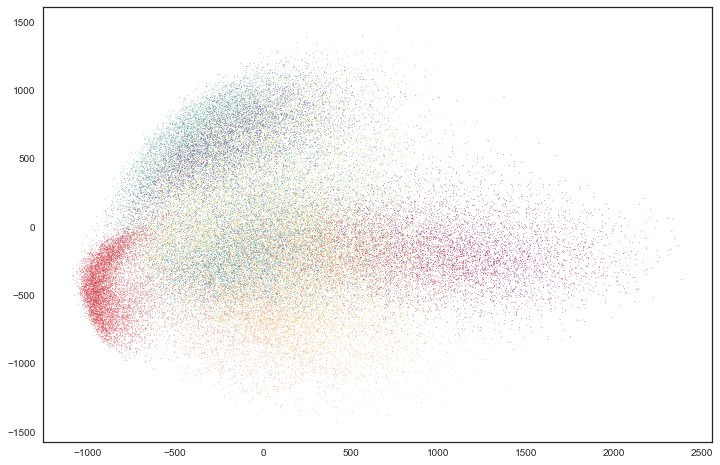

In [14]:
plt.scatter(u_pca[:,0], u_pca[:,1], c=labels, cmap="Spectral", s=0.1)